In [27]:
# import relevant libraries
%matplotlib inline
import json
from pandas.io.json import json_normalize
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Arc, Rectangle, ConnectionPatch
from matplotlib.offsetbox import  OffsetImage
import squarify
from functools import reduce
from statsbombpy import sb

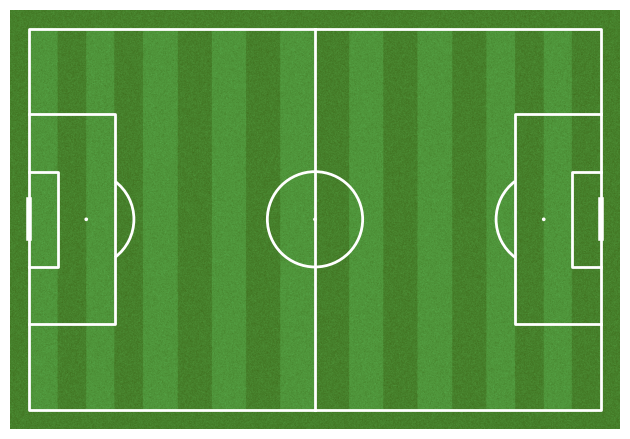

In [28]:
from mplsoccer.pitch import Pitch
pitch = Pitch(pitch_color='grass', line_color='white', stripe=True)
fig, ax = pitch.draw()

In [29]:
sb.competitions().head()


competition_id  season_id country_name  competition_name  \
0               9         27      Germany     1. Bundesliga   
1              16          4       Europe  Champions League   
2              16          1       Europe  Champions League   
3              16          2       Europe  Champions League   
4              16         27       Europe  Champions League   

  competition_gender  competition_youth  competition_international  \
0               male              False                      False   
1               male              False                      False   
2               male              False                      False   
3               male              False                      False   
4               male              False                      False   

  season_name               match_updated        match_updated_360  \
0   2015/2016  2023-12-12T07:43:33.436182                     None   
1   2018/2019  2023-03-07T12:20:48.118250  2021-06-13T16:17:31.694   
2   2017/2018  2021-08-27T11:26:39.802832  2021-06-13T16:17:31.694   
3   2016/2017  2021-08-27T11:26:39.802832  2021-06-13T16:17:31.694   
4   2015/2016  2021-08-27T11:26:39.802832  2021-06-13T16:17:31.694   

  match_available_360             match_available  
0                None  2023-12-12T07:43:33.436182  
1                None  2023-03-07T12:20:48.118250  
2                None  2021-01-23T21:55:30.425330  
3                None            2020-07-29T05:00  
4                None            2020-07-29T05:00

In [30]:
#pd.set_option('display.max_rows', None)
pd.reset_option('display.max_rows')

In [31]:
matches= sb.matches(competition_id=72, season_id=107)
matches.head()

match_id  match_date      kick_off                        competition  \
0   3904629  2023-08-16  13:00:00.000  International - Women's World Cup   
1   3906390  2023-08-20  13:00:00.000  International - Women's World Cup   
2   3906389  2023-08-19  11:00:00.000  International - Women's World Cup   
3   3904628  2023-08-15  11:00:00.000  International - Women's World Cup   
4   3893806  2023-07-26  10:30:00.000  International - Women's World Cup   

  season          home_team          away_team  home_score  away_score  \
0   2023  Australia Women's    England Women's           1           3   
1   2023      Spain Women's    England Women's           1           0   
2   2023     Sweden Women's  Australia Women's           2           0   
3   2023      Spain Women's     Sweden Women's           2           1   
4   2023      Spain Women's     Zambia Women's           5           0   

  match_status  ...            last_updated_360 match_week competition_stage  \
0    available  ...  2023-08-30T11:17:47.551826          6       Semi-finals   
1    available  ...  2023-08-22T19:38:43.965521          7             Final   
2    available  ...  2023-08-29T21:19:57.035390          7   3rd Place Final   
3    available  ...  2023-08-16T11:30:31.556462          6       Semi-finals   
4    available  ...  2023-08-15T02:58:57.266594          2       Group Stage   

            stadium              referee      home_managers  \
0     Accor Stadium           Tori Penso    Tony Gustavsson   
1     Accor Stadium           Tori Penso        Jorge Vilda   
2  Brisbane Stadium        Cheryl Foster  Peter Gerhardsson   
3         Eden Park  Edina Alves Batista        Jorge Vilda   
4         Eden Park       Hyeon-Jeong Oh        Jorge Vilda   

              away_managers data_version shot_fidelity_version  \
0  Sarina Glotzbach-Wiegman        1.1.0                     2   
1  Sarina Glotzbach-Wiegman        1.1.0                     2   
2           Tony Gustavsson        1.1.0                     2   
3         Peter Gerhardsson        1.1.0                     2   
4               Bruce Mwape        1.1.0                     2   

  xy_fidelity_version  
0                   2  
1                   2  
2                   2  
3                   2  
4                   2  

[5 rows x 22 columns]

In [32]:
import pandas as pd

# Assuming you have a dataframe named 'matches_df' with match details
argentina_matches = matches[(matches['home_team'] == "Australia Women's") | (matches['away_team'] == "Australia Women's")]
argentina_matches
# Extracting match IDs
match_ids = argentina_matches['match_id'].tolist()

# Printing match IDs
for match_id in match_ids:
    print(match_id)

3904629
3906389
3902968
3901736
3893809
3893788
3893821


In [33]:
argentina_matches

match_id  match_date      kick_off                        competition  \
0    3904629  2023-08-16  13:00:00.000  International - Women's World Cup   
2    3906389  2023-08-19  11:00:00.000  International - Women's World Cup   
11   3902968  2023-08-12  10:00:00.000  International - Women's World Cup   
20   3901736  2023-08-07  13:30:00.000  International - Women's World Cup   
29   3893809  2023-07-27  13:00:00.000  International - Women's World Cup   
32   3893788  2023-07-20  13:00:00.000  International - Women's World Cup   
49   3893821  2023-07-31  13:00:00.000  International - Women's World Cup   

   season          home_team                    away_team  home_score  \
0    2023  Australia Women's              England Women's           1   
2    2023     Sweden Women's            Australia Women's           2   
11   2023  Australia Women's               France Women's           0   
20   2023  Australia Women's              Denmark Women's           2   
29   2023  Australia Women's              Nigeria Women's           2   
32   2023  Australia Women's  Republic of Ireland Women's           1   
49   2023     Canada Women's            Australia Women's           0   

    away_score match_status  ...            last_updated_360 match_week  \
0            3    available  ...  2023-08-30T11:17:47.551826          6   
2            0    available  ...  2023-08-29T21:19:57.035390          7   
11           0    available  ...  2023-08-31T14:34:02.359150          5   
20           0    available  ...  2023-09-01T11:58:41.158565          4   
29           3    available  ...  2023-08-18T14:06:33.469348          2   
32           0    available  ...  2023-08-04T15:35:05.088854          1   
49           4    available  ...  2023-08-21T13:32:38.370713          3   

   competition_stage            stadium                    referee  \
0        Semi-finals      Accor Stadium                 Tori Penso   
2    3rd Place Final   Brisbane Stadium              Cheryl Foster   
11    Quarter-finals   Brisbane Stadium  María Belén Carvajal Peña   
20       Round of 16  Stadium Australia              Rebecca Welch   
29       Group Stage   Brisbane Stadium             Esther Staubli   
32       Group Stage      Accor Stadium        Edina Alves Batista   
49       Group Stage          AAMI Park         Stéphanie Frappart   

        home_managers             away_managers data_version  \
0     Tony Gustavsson  Sarina Glotzbach-Wiegman        1.1.0   
2   Peter Gerhardsson           Tony Gustavsson        1.1.0   
11    Tony Gustavsson              Hervé Renard        1.1.0   
20    Tony Gustavsson          Lars Søndergaard        1.1.0   
29    Tony Gustavsson      Randy Marlon Waldrum        1.1.0   
32    Tony Gustavsson                 Vera Pauw        1.1.0   
49  Beverly Priestman           Tony Gustavsson        1.1.0   

   shot_fidelity_version xy_fidelity_version  
0                      2                   2  
2                      2                   2  
11                     2                   2  
20                     2                   2  
29                     2                   2  
32                     2                   2  
49                     2                   2  

[7 rows x 22 columns]

In [34]:
sb.lineups(match_id=3901736)["Australia Women's"]["player_name"]


0                Samantha May Kerr
1                    Katrina Gorry
2           Stephanie-Elise Catley
3                   Kyah Pam Simon
4     Lydia Grace Yilkari Williams
5          Emily Louise van Egmond
6         Alanna Stephanie Kennedy
7          Ellie Madison Carpenter
8                 Hayley Emma Raso
9     Clare Elizabeth Polkinghorne
10              Caitlin Jade Foord
11                   Tameka Yallop
12       Aivi Belinda Kerstin Luik
13                Mary Boio Fowler
14                Mackenzie Arnold
15               Alexandra Chidiac
16        Kyra Lillee Cooney-Cross
17               Teagan Jade Micah
18             Courtney Jade Nevin
19           Charlotte Layne Grant
20                   Clare Wheeler
21             Cortnee Brooke Vine
22                      Clare Hunt
Name: player_name, dtype: object

In [35]:
sb.events(match_id=3901736, split=True, flatten_attrs=False)["passes"].head()

id  index  period     timestamp  minute  \
0  eb56498e-d799-4e39-b78e-b2bded1e0616      5       1  00:00:00.524       0   
1  c439cc92-8c68-4cda-8785-2752ccc03ed3      7       1  00:00:02.874       0   
2  503618ed-bc20-43ae-8a5a-df42763c2791      9       1  00:00:19.582       0   
3  33643553-bf97-4b26-8fea-6b5a3f804293     13       1  00:00:20.502       0   
4  a926c313-b7a4-4ba2-8610-0d7872baaef3     16       1  00:00:21.016       0   

   second  type  possession    possession_team   play_pattern  ...  duration  \
0       0  Pass           2    Denmark Women's  From Kick Off  ...  1.002855   
1       2  Pass           2    Denmark Women's  From Kick Off  ...  6.059964   
2      19  Pass           3  Australia Women's  From Throw In  ...  0.851899   
3      20  Pass           3  Australia Women's  From Throw In  ...  0.456909   
4      21  Pass           3  Australia Women's  From Throw In  ...  1.730173   

                                                                 related_events  \
0                                        [4b92fbf8-a3cd-4ec5-8552-e744fdfbc9e4]   
1                                        [a78fd26c-484a-45ae-935f-05568a7bdc03]   
2                                        [6f96af6c-753b-4748-939d-459a30e828d2]   
3  [374a1002-1654-4346-a42d-c60eb943753a, be8c0b5e-a7c9-4e11-8068-2685add5dbe1]   
4  [bca09558-dad0-4e7c-ac68-8a85cd30b3da, f4d81126-2866-4cd8-ba6e-ce8ac1863b24]   

                                                                                                                                                                                                                                                                                  pass  \
0                   {'recipient': {'id': 32230, 'name': 'Karen Holmgaard'}, 'length': 15.705094, 'angle': -3.1161203, 'height': {'id': 1, 'name': 'Ground Pass'}, 'end_location': [45.3, 39.7], 'body_part': {'id': 40, 'name': 'Right Foot'}, 'type': {'id': 65, 'name': 'Kick Off'}}   
1  {'recipient': {'id': 224831, 'name': 'Amalie Jørgensen Vangsgaard'}, 'length': 84.0072, 'angle': 0.5030518, 'height': {'id': 3, 'name': 'High Pass'}, 'end_location': [117.6, 80.0], 'switch': True, 'outcome': {'id': 75, 'name': 'Out'}, 'body_part': {'id': 37, 'name': 'Head'}}   
2                                                              {'recipient': {'id': 131586, 'name': 'Kyra Lillee Cooney-Cross'}, 'length': 9.625487, 'angle': 1.0000831, 'height': {'id': 2, 'name': 'Low Pass'}, 'end_location': [15.6, 8.2], 'type': {'id': 67, 'name': 'Throw-in'}}   
3                                                         {'recipient': {'id': 5000, 'name': 'Stephanie-Elise Catley'}, 'length': 6.0033326, 'angle': -2.0940747, 'height': {'id': 2, 'name': 'Low Pass'}, 'end_location': [11.2, 1.5], 'body_part': {'id': 40, 'name': 'Right Foot'}}   
4           {'recipient': {'id': 131586, 'name': 'Kyra Lillee Cooney-Cross'}, 'length': 5.661272, 'angle': 0.9484935, 'height': {'id': 3, 'name': 'High Pass'}, 'end_location': [13.1, 6.1], 'outcome': {'id': 9, 'name': 'Incomplete'}, 'body_part': {'id': 38, 'name': 'Left Foot'}}   

  match_id  possession_team_id team_id player_id  under_pressure  off_camera  \
0  3901736                 853     853    276443             NaN         NaN   
1  3901736                 853     853     32230             NaN         NaN   
2  3901736                1205    1205      5000             NaN         NaN   
3  3901736                1205    1205    131586            True         NaN   
4  3901736                1205    1205      5000             NaN         NaN   

   counterpress  
0           NaN  
1           NaN  
2           NaN  
3           NaN  
4           NaN  

[5 rows x 24 columns]

In [36]:
import json
# loading the json file
with open('AUS/3901736.json') as data_file:    
    data = json.load(data_file)
df = pd.json_normalize(data, sep = "_")

In [37]:
Katrina_pass = df[(df['type_name'] == "Pass") & (df['player_name']=='Katrina Gorry')] # get passing information of Katrina
pass_column = [i for i in df.columns if i.startswith("pass")]
Katrina_pass = Katrina_pass[["id", "period", "timestamp", "location", "pass_end_location", "pass_recipient_name","pass_outcome_name"]]
Katrina_pass

id  period     timestamp  \
124   d0237353-0247-4c4a-ad9f-eaf7f0f69772       1  00:02:34.841   
152   24054ec1-45a0-47f8-83de-3cd0f325e3e8       1  00:03:11.409   
190   b9d647b8-ef32-4ea0-b22d-f21b6c9aadcc       1  00:04:00.574   
197   24e34853-c68b-4af9-93a2-ed1b284093a6       1  00:04:04.489   
250   5201b11d-130b-4321-b959-628e201e65ef       1  00:05:48.670   
289   55ebd923-9bf5-4720-8780-a5fa4abf0012       1  00:07:13.437   
372   531108eb-e8a6-44e8-8ee4-19917fbd70ad       1  00:09:32.867   
389   5a82644f-b221-4d0b-8103-c012a7ef02d0       1  00:10:29.359   
573   573c309c-d9b9-463d-bfa1-f268956b95cf       1  00:13:38.517   
637   d319f754-c826-4f70-bb59-704003749a8d       1  00:15:10.832   
724   7b10cc46-7611-4dcb-bbf4-3019297076a2       1  00:19:07.946   
845   1a806bd9-3f78-4346-a5bc-5395ce861413       1  00:22:37.497   
867   674aaf5a-889e-4ff2-aeae-a9ec3f36a0a7       1  00:23:40.733   
896   3f1417dd-6076-4e67-94c6-9471676b5fe2       1  00:24:29.692   
932   6a5bb34f-f832-49b8-9b64-e456e4310325       1  00:25:19.462   
945   37ec1ca9-5793-4c5c-a48d-fe926268f334       1  00:25:37.575   
975   c6a14945-7d50-4267-9f41-eb090f73c075       1  00:26:12.451   
1037  62c08247-3ea1-40d7-9ab7-7bcff198bd1f       1  00:27:09.852   
1046  8dd24d24-b037-4e89-bd2f-9f680b86f0da       1  00:27:20.297   
1228  5bd295b0-7a07-4fbe-8e62-22a47532d17d       1  00:33:38.886   
1273  2f02aab9-396b-4d0a-a3f7-e435a9e7bef4       1  00:34:34.861   
1283  17ca34ad-bdee-4a11-a838-72ca7d7b7078       1  00:34:47.550   
1351  12d27e7c-97fc-4ce7-9b1f-85b3024f2833       1  00:36:59.522   
1396  57733911-dc37-42a2-8970-da172449b90c       1  00:38:07.428   
1460  bc5122dc-537e-48a7-8299-8e74834116bf       1  00:39:23.631   
1466  95939b00-9090-4a42-badd-183674b568fe       1  00:39:28.850   
1484  b6bfa4ad-f14a-4e55-b882-9adee951243e       1  00:39:45.334   
1542  2acc709a-0b77-4fbc-a30d-c0915310c325       1  00:41:01.411   
1743  90da4aaa-6503-4173-bc6a-0cfb8417fe10       1  00:44:53.635   
1844  e8f8a964-9039-476f-857e-8eb09025fb88       2  00:00:01.918   
1909  d0d2134d-26da-4010-8d94-fd05e2b25e79       2  00:02:04.474   
1979  c2bb26e3-ab17-4b5a-9cf4-06ca19518832       2  00:03:44.004   
2194  24330382-02fe-49ed-884d-ce13ae373fe6       2  00:09:23.667   
2220  0088e37d-b50b-47f3-8eb4-ea880e9b5ddd       2  00:09:50.895   
2272  c5ddc682-c1af-4ae9-840f-931cc457db59       2  00:11:41.551   
2281  246f67eb-701c-4fd8-b294-62127969a634       2  00:11:48.269   
2294  533afa88-8121-42c3-b8e7-5117d0a22bb0       2  00:12:04.437   
2346  35d39fe9-b577-41af-abbb-34850c12942f       2  00:14:26.091   
2352  f3023c0c-8316-4417-81fa-83d40a84bcc9       2  00:14:31.051   
2487  cbcbcbfe-349c-463c-aea1-59ba69eb919d       2  00:18:47.063   
2500  8a9de60a-61b9-498c-a83a-95495f63a1bd       2  00:18:53.716   
2568  63e36e7b-2546-464d-9e01-52d005acd9af       2  00:20:12.402   
2587  7080e234-bf53-4bf2-9ee3-eebe5183f996       2  00:20:28.261   
2728  580e9232-3f7a-43d5-bb8c-d80ec1faa09d       2  00:27:36.362   
2785  5c1f5b85-4daa-4ab4-915e-77e6ade974a0       2  00:28:27.467   
2791  3b4d3fee-9d60-46e9-ac4b-dce959f49f98       2  00:28:33.275   
2832  c0507b12-cf64-456a-9d83-eba6757cdc90       2  00:29:23.841   
2868  254b6786-3c59-47d2-a4c4-41c63a533810       2  00:30:16.160   
2880  ff113383-4e1a-4803-ad66-f91e7761ec28       2  00:30:24.883   
2975  755bcb3d-1c42-40fd-8ef9-0a06c3c7f0cf       2  00:34:55.344   
3086  8e87a0f9-a42a-41f3-b116-0a671d337835       2  00:38:29.158   
3283  666198c5-affd-442a-97f4-86b660c50351       2  00:44:00.911   
3363  0dbe3962-8140-4f23-857b-c2b0d9a98cf6       2  00:46:07.328   

          location pass_end_location       pass_recipient_name  \
124   [40.2, 32.1]      [23.2, 44.4]                Clare Hunt   
152   [52.1, 19.0]      [17.2, 19.8]  Alanna Stephanie Kennedy   
190   [46.2, 66.0]      [62.5, 67.4]   Emily Louise van Egmond   
197   [58.3, 69.7]      [96.1, 79.5]          Mary Boio Fowler   
250   [90.4, 13.0]     [109.5, 38.1] 

In [38]:
incomplete_pass_count = Katrina_pass['pass_outcome_name'].value_counts().get('Incomplete', 0)
print(incomplete_pass_count)


12


In [39]:
import io
buf = io.StringIO()
df.info(buf=buf, verbose=True)
info_output = buf.getvalue()

print(info_output)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3499 entries, 0 to 3498
Data columns (total 111 columns):
 #    Column                          Dtype  
---   ------                          -----  
 0    id                              object 
 1    index                           int64  
 2    period                          int64  
 3    timestamp                       object 
 4    minute                          int64  
 5    second                          int64  
 6    possession                      int64  
 7    duration                        float64
 8    type_id                         int64  
 9    type_name                       object 
 10   possession_team_id              int64  
 11   possession_team_name            object 
 12   play_pattern_id                 int64  
 13   play_pattern_name               object 
 14   team_id                         int64  
 15   team_name                       object 
 16   tactics_formation               float64
 17   tactics_line

In [40]:
# To see unique values
# Adjust pandas display options
pd.set_option('display.max_colwidth', None)

# Print the first two rows of the 'tactics_lineup' column
df['tactics_lineup'].head(2)


0      [{'player': {'id': 42787, 'name': 'Mackenzie Arnold'}, 'position': {'id': 1, 'name': 'Goalkeeper'}, 'jersey_number': 18}, {'player': {'id': 5095, 'name': 'Ellie Madison Carpenter'}, 'position': {'id': 2, 'name': 'Right Back'}, 'jersey_number': 21}, {'player': {'id': 401635, 'name': 'Clare Hunt'}, 'position': {'id': 3, 'name': 'Right Center Back'}, 'jersey_number': 15}, {'player': {'id': 5078, 'name': 'Alanna Stephanie Kennedy'}, 'position': {'id': 5, 'name': 'Left Center Back'}, 'jersey_number': 14}, {'player': {'id': 5000, 'name': 'Stephanie-Elise Catley'}, 'position': {'id': 6, 'name': 'Left Back'}, 'jersey_number': 7}, {'player': {'id': 4979, 'name': 'Katrina Gorry'}, 'position': {'id': 9, 'name': 'Right Defensive Midfield'}, 'jersey_number': 19}, {'player': {'id': 131586, 'name': 'Kyra Lillee Cooney-Cross'}, 'position': {'id': 11, 'name': 'Left Defensive Midfield'}, 'jersey_number': 23}, {'player': {'id': 6818, 'name': 'Hayley Emma Raso'}, 'position': {'id': 12, 'name': 'Rig

In [41]:
df['tactics_formation'].head(2)


0     442.0
1    4231.0
Name: tactics_formation, dtype: float64

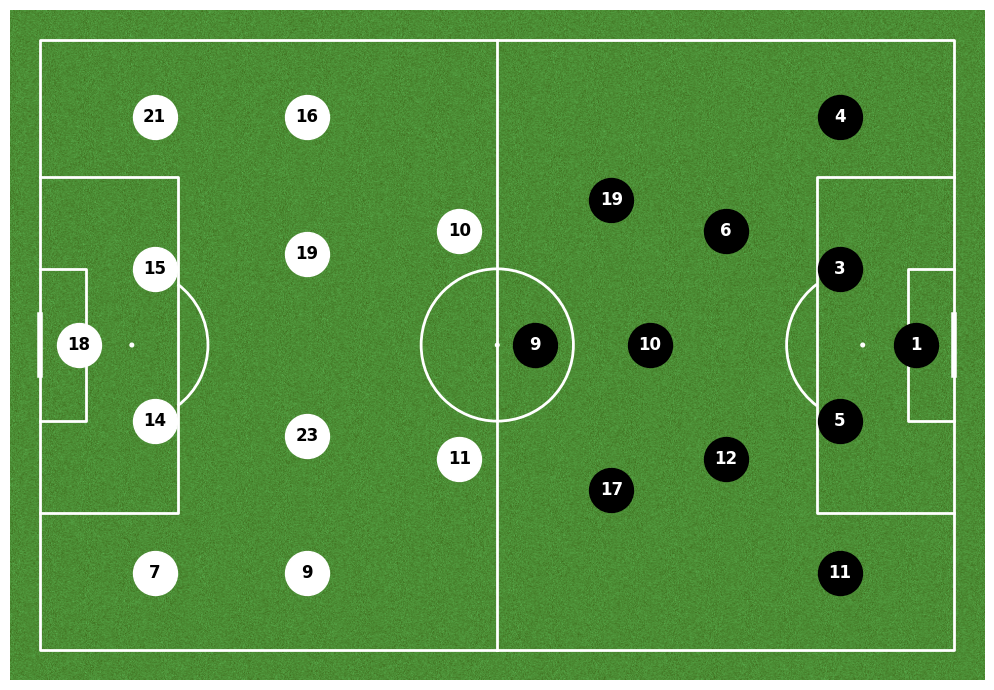

In [42]:
from mplsoccer.pitch import Pitch
import matplotlib.pyplot as plt
import pandas as pd

def plot_players_on_pitch(lineups):
    pitch = Pitch(pitch_color='grass', line_color='white', stripe=False)
    fig, ax = pitch.draw(figsize=(12, 7))
    
    # Define positions based on the formation
    positions = {
        'Goalkeeper': [(5, 40), (115, 40)],
        'Right Back': [(15, 10), (105, 10)],
        'Right Center Back': [(15, 30), (105, 30)],
        'Left Center Back': [(15, 50), (105, 50)],
        'Left Back': [(15, 70), (105, 70)],
        'Right Midfield': [(35, 10), None],
        'Right Center Midfield': [(35, 30), None],
        'Left Center Midfield': [(35, 50), None],
        'Left Midfield': [(35, 70), None],
        'Right Defensive Midfield': [(35, 28), (90,25)], 
        'Left Defensive Midfield': [(35, 52), (90,55)],   
        'Right Center Forward': [(55, 25), None],
        'Left Center Forward': [(55, 55), None],
        'Right Wing': [None, (75, 21)],
        'Center Attacking Midfield': [None, (80, 40)],
        'Left Wing': [None, (75, 59)],
        'Center Forward': [None, (65, 40)]
    }
    
    team_colors = [['white', 'black'], ['black', 'white']]
    
    for lineup in lineups:
        for player in lineup:
            position_name = player['position']['name']
            jersey_number = player['jersey_number']
            team_idx = lineups.index(lineup)  # 0 for the first team, 1 for the second
            if positions.get(position_name) and positions[position_name][team_idx]:
                x, y = positions[position_name][team_idx]
                ax.scatter(x, y, color=team_colors[team_idx][0], s=1000, zorder=2)
                ax.text(x, y, str(jersey_number), color=team_colors[team_idx][1], ha='center', va='center', fontsize=12, fontweight='bold', zorder=3)
    
    plt.show()

# Extract the lineups from the DataFrame and plot
lineups = df['tactics_lineup'].head(2).tolist()
plot_players_on_pitch(lineups)


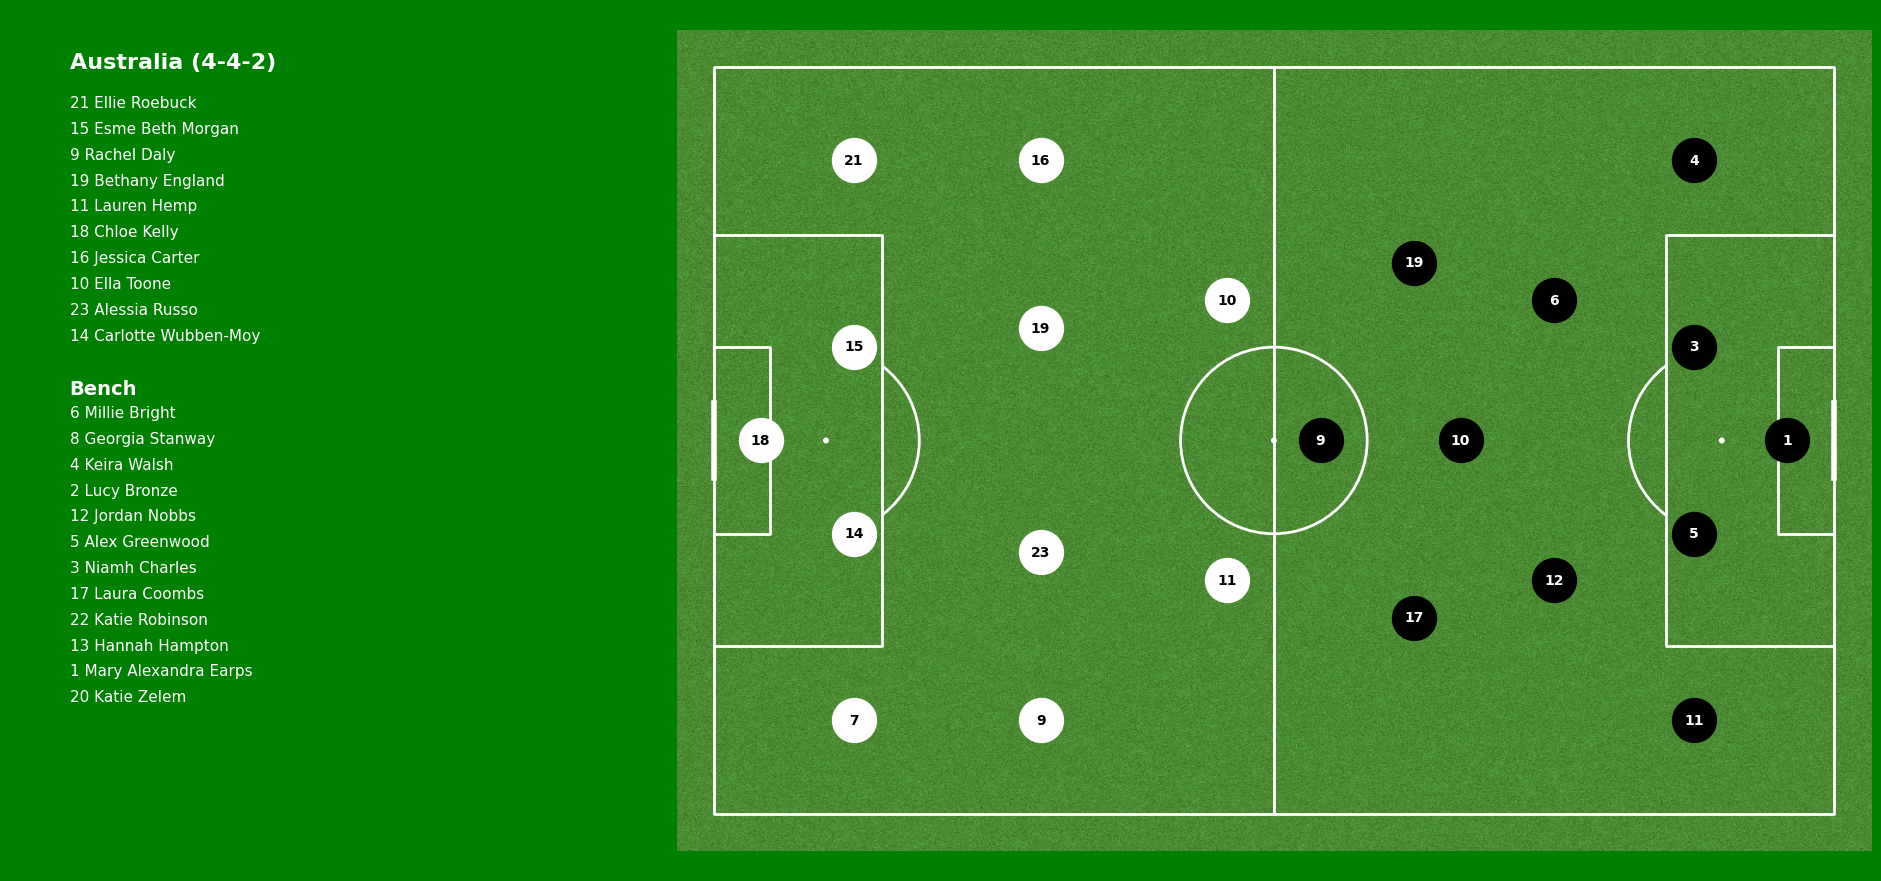

In [43]:
from mplsoccer.pitch import Pitch
import matplotlib.pyplot as plt
import pandas as pd

def plot_players_on_pitch(lineups, full_squad):
    fig = plt.figure(figsize=(20, 10), facecolor='green')
    
    # Split the figure into two distinct parts
    gs = fig.add_gridspec(1, 2, width_ratios=[1, 2])
    
    # Left side for team information
    ax_info = fig.add_subplot(gs[0], facecolor='green')
    ax_info.axis('off')
    
    # Right side for the pitch
    pitch = Pitch(pitch_color='grass', line_color='white', stripe=False)
    ax = fig.add_subplot(gs[1], frame_on=False)
    pitch.draw(ax=ax)
    
    # Define positions based on the formation
    positions = {
        'Goalkeeper': [(5, 40), (115, 40)],
        'Right Back': [(15, 10), (105, 10)],
        'Right Center Back': [(15, 30), (105, 30)],
        'Left Center Back': [(15, 50), (105, 50)],
        'Left Back': [(15, 70), (105, 70)],
        'Right Midfield': [(35, 10), None],
        'Right Center Midfield': [(35, 30), None],
        'Left Center Midfield': [(35, 50), None],
        'Left Midfield': [(35, 70), None],
        'Right Defensive Midfield': [(35, 28), (90,25)], 
        'Left Defensive Midfield': [(35, 52), (90,55)],   
        'Right Center Forward': [(55, 25), None],
        'Left Center Forward': [(55, 55), None],
        'Right Wing': [None, (75, 21)],
        'Center Attacking Midfield': [None, (80, 40)],
        'Left Wing': [None, (75, 59)],
        'Center Forward': [None, (65, 40)]
    }
    
    team_colors = [['white', 'black'], ['black', 'white']]
    
    for lineup in lineups:
        for player in lineup:
            position_name = player['position']['name']
            jersey_number = player['jersey_number']
            team_idx = lineups.index(lineup)
            if positions.get(position_name) and positions[position_name][team_idx]:
                x, y = positions[position_name][team_idx]
                ax.scatter(x, y, color=team_colors[team_idx][0], s=1000, zorder=2)
                ax.text(x, y, str(jersey_number), color=team_colors[team_idx][1], ha='center', va='center', fontsize=10, fontweight='bold', zorder=3, bbox=None)  # Set bbox to None
    
    # Extract starting XI and bench players
    starting_XI = [player for player in full_squad if player['jersey_number'] in [p['jersey_number'] for p in lineups[0]]]
    bench = [player for player in full_squad if player not in starting_XI]
    
    # Display team name and formation as a header
    ax_info.text(0.1, 0.95, "Australia (4-4-2)", ha='left', va='top', fontsize=16, fontweight='bold', color='white')
    
    # List starting players below the header
    y_start = 0.9
    for idx, player in enumerate(starting_XI):
        ax_info.text(0.1, y_start - idx * 0.03, f"{player['jersey_number']} {player['player_name']}", ha='left', va='top', fontsize=11, color='white')
    
    # Display "Bench" as a sub-header below the starting players
    bench_start = y_start - len(starting_XI) * 0.03 - 0.03  # Adjusted for consistent gap
    ax_info.text(0.1, bench_start, "Bench", ha='left', va='top', fontsize=14, fontweight='bold', color='white')
    
    # List bench players below the "Bench" sub-header
    for idx, player in enumerate(bench):
        ax_info.text(0.1, bench_start - 0.03 - idx * 0.03, f"{player['jersey_number']} {player['player_name']}", ha='left', va='top', fontsize=11, color='white')
    
    plt.tight_layout(pad=5)
    plt.show()


# Extract the lineups from the DataFrame and plot
lineups = df['tactics_lineup'].head(2).tolist()

# Full squad data for Australia
full_squad = sb.lineups(match_id=3904629)["England Women's"].to_dict('records')

plot_players_on_pitch(lineups, full_squad)


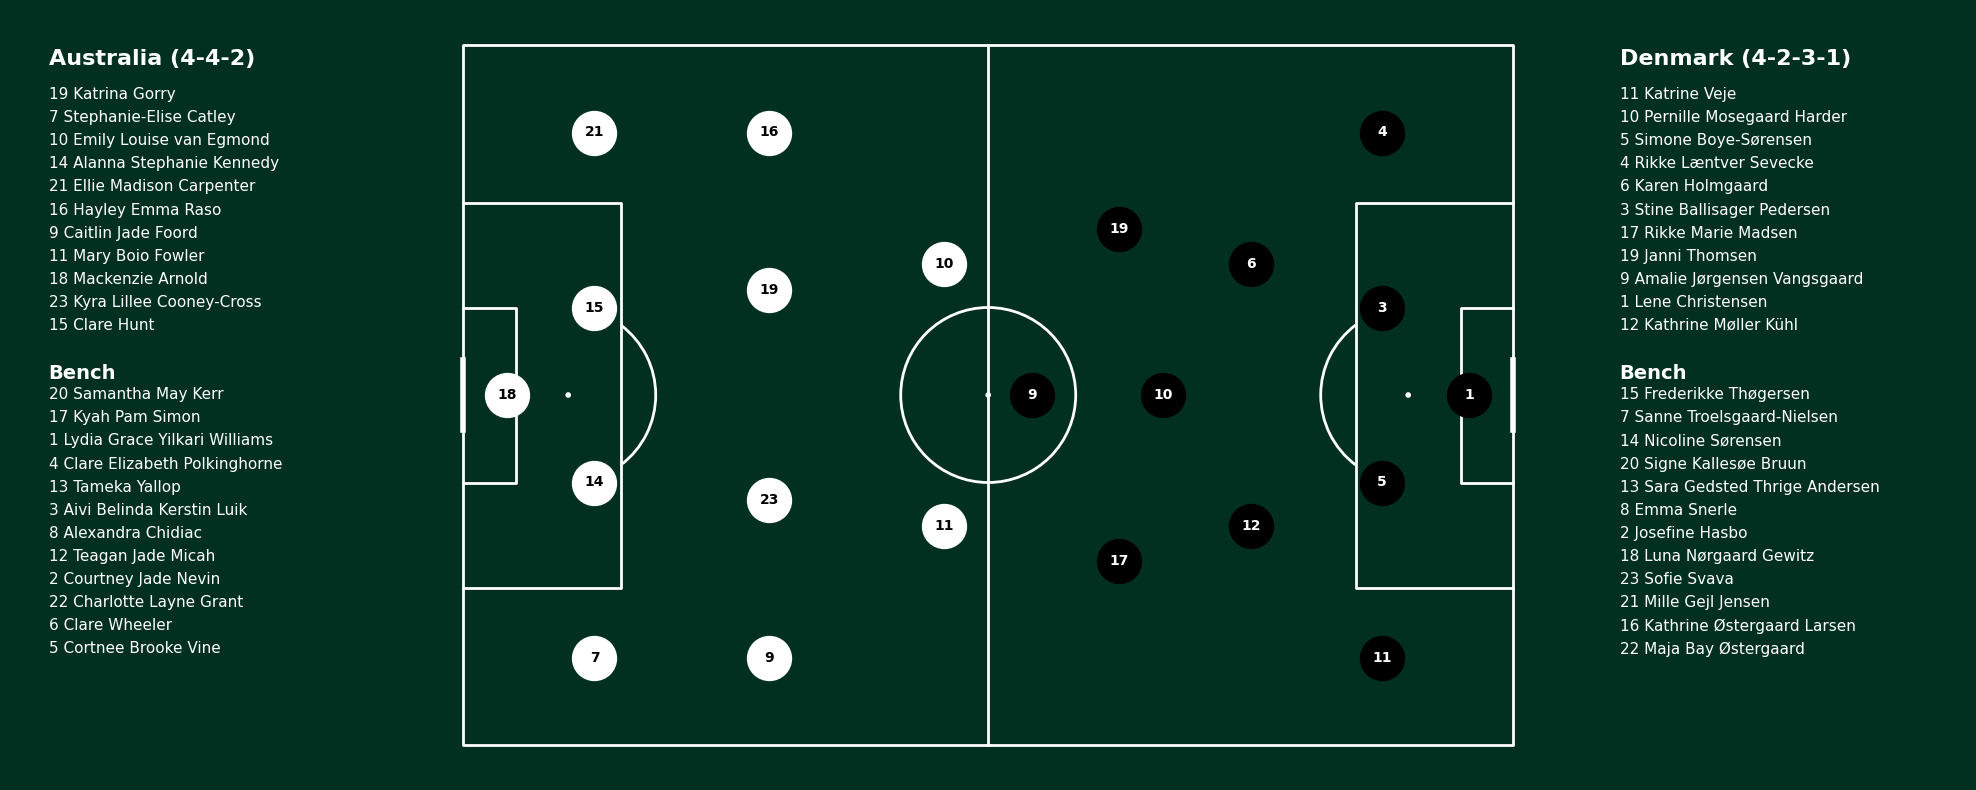

In [44]:
from mplsoccer.pitch import Pitch
import matplotlib.pyplot as plt
import pandas as pd


def plot_players_on_pitch(lineups, full_squad_aus, full_squad_den):
    fig = plt.figure(figsize=(20, 8), facecolor='#023020')
    
    # Split the figure into three distinct parts
    gs = fig.add_gridspec(1, 3, width_ratios=[1, 3, 1], height_ratios=[1])
    
    # Left side for Australia's team information
    ax_info_aus = fig.add_subplot(gs[0], facecolor='#023020')
    ax_info_aus.axis('off')
    
    # Right side for Denmark's team information
    ax_info_den = fig.add_subplot(gs[2], facecolor='#023020')
    ax_info_den.axis('off')
    
    # Middle for the pitch
    pitch = Pitch(pitch_color='#023020', line_color='white', stripe=False)
    ax = fig.add_subplot(gs[1], frame_on=False)
    pitch.draw(ax=ax)
    
       # Define positions based on the formation
    positions = {
        'Goalkeeper': [(5, 40), (115, 40)],
        'Right Back': [(15, 10), (105, 10)],
        'Right Center Back': [(15, 30), (105, 30)],
        'Left Center Back': [(15, 50), (105, 50)],
        'Left Back': [(15, 70), (105, 70)],
        'Right Midfield': [(35, 10), None],
        'Right Center Midfield': [(35, 30), None],
        'Left Center Midfield': [(35, 50), None],
        'Left Midfield': [(35, 70), None],
        'Right Defensive Midfield': [(35, 28), (90,25)], 
        'Left Defensive Midfield': [(35, 52), (90,55)],   
        'Right Center Forward': [(55, 25), None],
        'Left Center Forward': [(55, 55), None],
        'Right Wing': [None, (75, 21)],
        'Center Attacking Midfield': [None, (80, 40)],
        'Left Wing': [None, (75, 59)],
        'Center Forward': [None, (65, 40)]
    }
    
    team_colors = [['white', 'black'], ['black', 'white']]
    
    for lineup in lineups:
        for player in lineup:
            position_name = player['position']['name']
            jersey_number = player['jersey_number']
            team_idx = lineups.index(lineup)
            if positions.get(position_name) and positions[position_name][team_idx]:
                x, y = positions[position_name][team_idx]
                ax.scatter(x, y, color=team_colors[team_idx][0], s=1000, zorder=2)
                ax.text(x, y, str(jersey_number), color=team_colors[team_idx][1], ha='center', va='center', fontsize=10, fontweight='bold', zorder=3, bbox=None)  # Set bbox to None
    
    
    # Extract starting XI and bench players for Australia
    starting_XI_aus = [player for player in full_squad_aus if player['jersey_number'] in [p['jersey_number'] for p in lineups[0]]]
    bench_aus = [player for player in full_squad_aus if player not in starting_XI_aus]
    
    # Display Australia's team name and formation as a header
    ax_info_aus.text(0.1, 0.95, "Australia (4-4-2)", ha='left', va='top', fontsize=16, fontweight='bold', color='white')
    
    # List starting players below the header for Australia
    y_start_aus = 0.9
    for idx, player in enumerate(starting_XI_aus):
        ax_info_aus.text(0.1, y_start_aus - idx * 0.03, f"{player['jersey_number']} {player['player_name']}", ha='left', va='top', fontsize=11, color='white')
    
    # Display "Bench" as a sub-header below the starting players for Australia
    bench_start_aus = y_start_aus - len(starting_XI_aus) * 0.03 - 0.03
    ax_info_aus.text(0.1, bench_start_aus, "Bench", ha='left', va='top', fontsize=14, fontweight='bold', color='white')
    
    # List bench players below the "Bench" sub-header for Australia
    for idx, player in enumerate(bench_aus):
        ax_info_aus.text(0.1, bench_start_aus - 0.03 - idx * 0.03, f"{player['jersey_number']} {player['player_name']}", ha='left', va='top', fontsize=11, color='white')
    
    
    # Extract starting XI and bench players for Denmark
    starting_XI_den = [player for player in full_squad_den if player['jersey_number'] in [p['jersey_number'] for p in lineups[1]]]
    bench_den = [player for player in full_squad_den if player not in starting_XI_den]
    
    # Display Denmark's team name and formation as a header
    ax_info_den.text(0.1, 0.95, "Denmark (4-2-3-1)", ha='left', va='top', fontsize=16, fontweight='bold', color='white')
    
    # List starting players below the header
    y_start_den = 0.9
    for idx, player in enumerate(starting_XI_den):
        ax_info_den.text(0.1, y_start_den - idx * 0.03, f"{player['jersey_number']} {player['player_name']}", ha='left', va='top', fontsize=11, color='white')
    
    # Display "Bench" as a sub-header below the starting players for Denmark
    bench_start_den = y_start_den - len(starting_XI_den) * 0.03 - 0.03
    ax_info_den.text(0.1, bench_start_den, "Bench", ha='left', va='top', fontsize=14, fontweight='bold', color='white')
    
    # List bench players below the "Bench" sub-header for Denmark
    for idx, player in enumerate(bench_den):
        ax_info_den.text(0.1, bench_start_den - 0.03 - idx * 0.03, f"{player['jersey_number']} {player['player_name']}", ha='left', va='top', fontsize=11, color='white')
    
    
    plt.tight_layout()
    plt.show()

# Extract the lineups from the DataFrame
lineups = df['tactics_lineup'].head(2).tolist()

# Full squad data for Australia and Denmark
full_squad_aus = sb.lineups(match_id=3901736)["Australia Women's"].to_dict('records')
full_squad_den = sb.lineups(match_id=3901736)["Denmark Women's"].to_dict('records')

plot_players_on_pitch(lineups, full_squad_aus, full_squad_den)


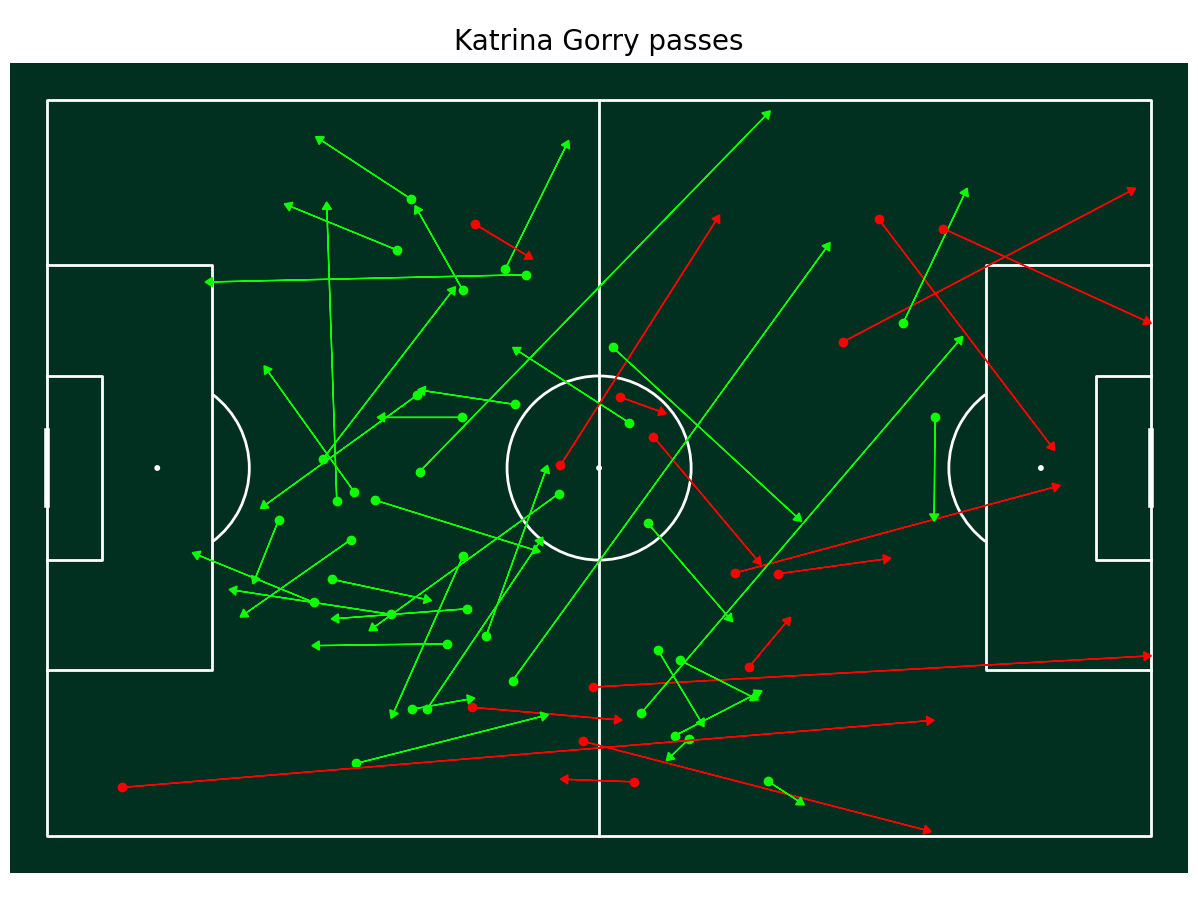

In [45]:
from mplsoccer import Pitch

def generatePlayerPassMap(player_name):
    # Filter the dataframe for passes made by the specified player
    player_filter = (df['type_name'] == 'Pass') & (df['player_name'] == player_name)
    player_df = df.loc[player_filter, ['location', 'pass_end_location', 'pass_outcome_name']]

    # Initialize the pitch
    pitch = Pitch(line_color='white', pitch_color='#023020')
    fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False, endnote_height=0.04, title_space=0, endnote_space=0)

    # Loop through the filtered dataframe and plot the passes
    for i in player_df.index:
        x, y = player_df['location'][i]
        end_x, end_y = player_df['pass_end_location'][i]
        dx = end_x - x
        dy = end_y - y
        
        # Check if the pass was incomplete
        if player_df['pass_outcome_name'][i] != 'Incomplete' and player_df['pass_outcome_name'][i] != 'Out':
            ax['pitch'].arrow(x, y, dx, dy, color='#0dff00', length_includes_head=True, head_width=1, head_length=0.8)
            pitch.scatter(x, y, color='#0dff00', ax=ax['pitch'])
        else:
            ax['pitch'].arrow(x, y, dx, dy, color='red', length_includes_head=True, head_width=1, head_length=0.8)
            pitch.scatter(x, y, color='red', ax=ax['pitch'])

    # Set the title
    fig.suptitle(player_name + " passes", fontsize=20)

# Test the function
generatePlayerPassMap("Katrina Gorry")


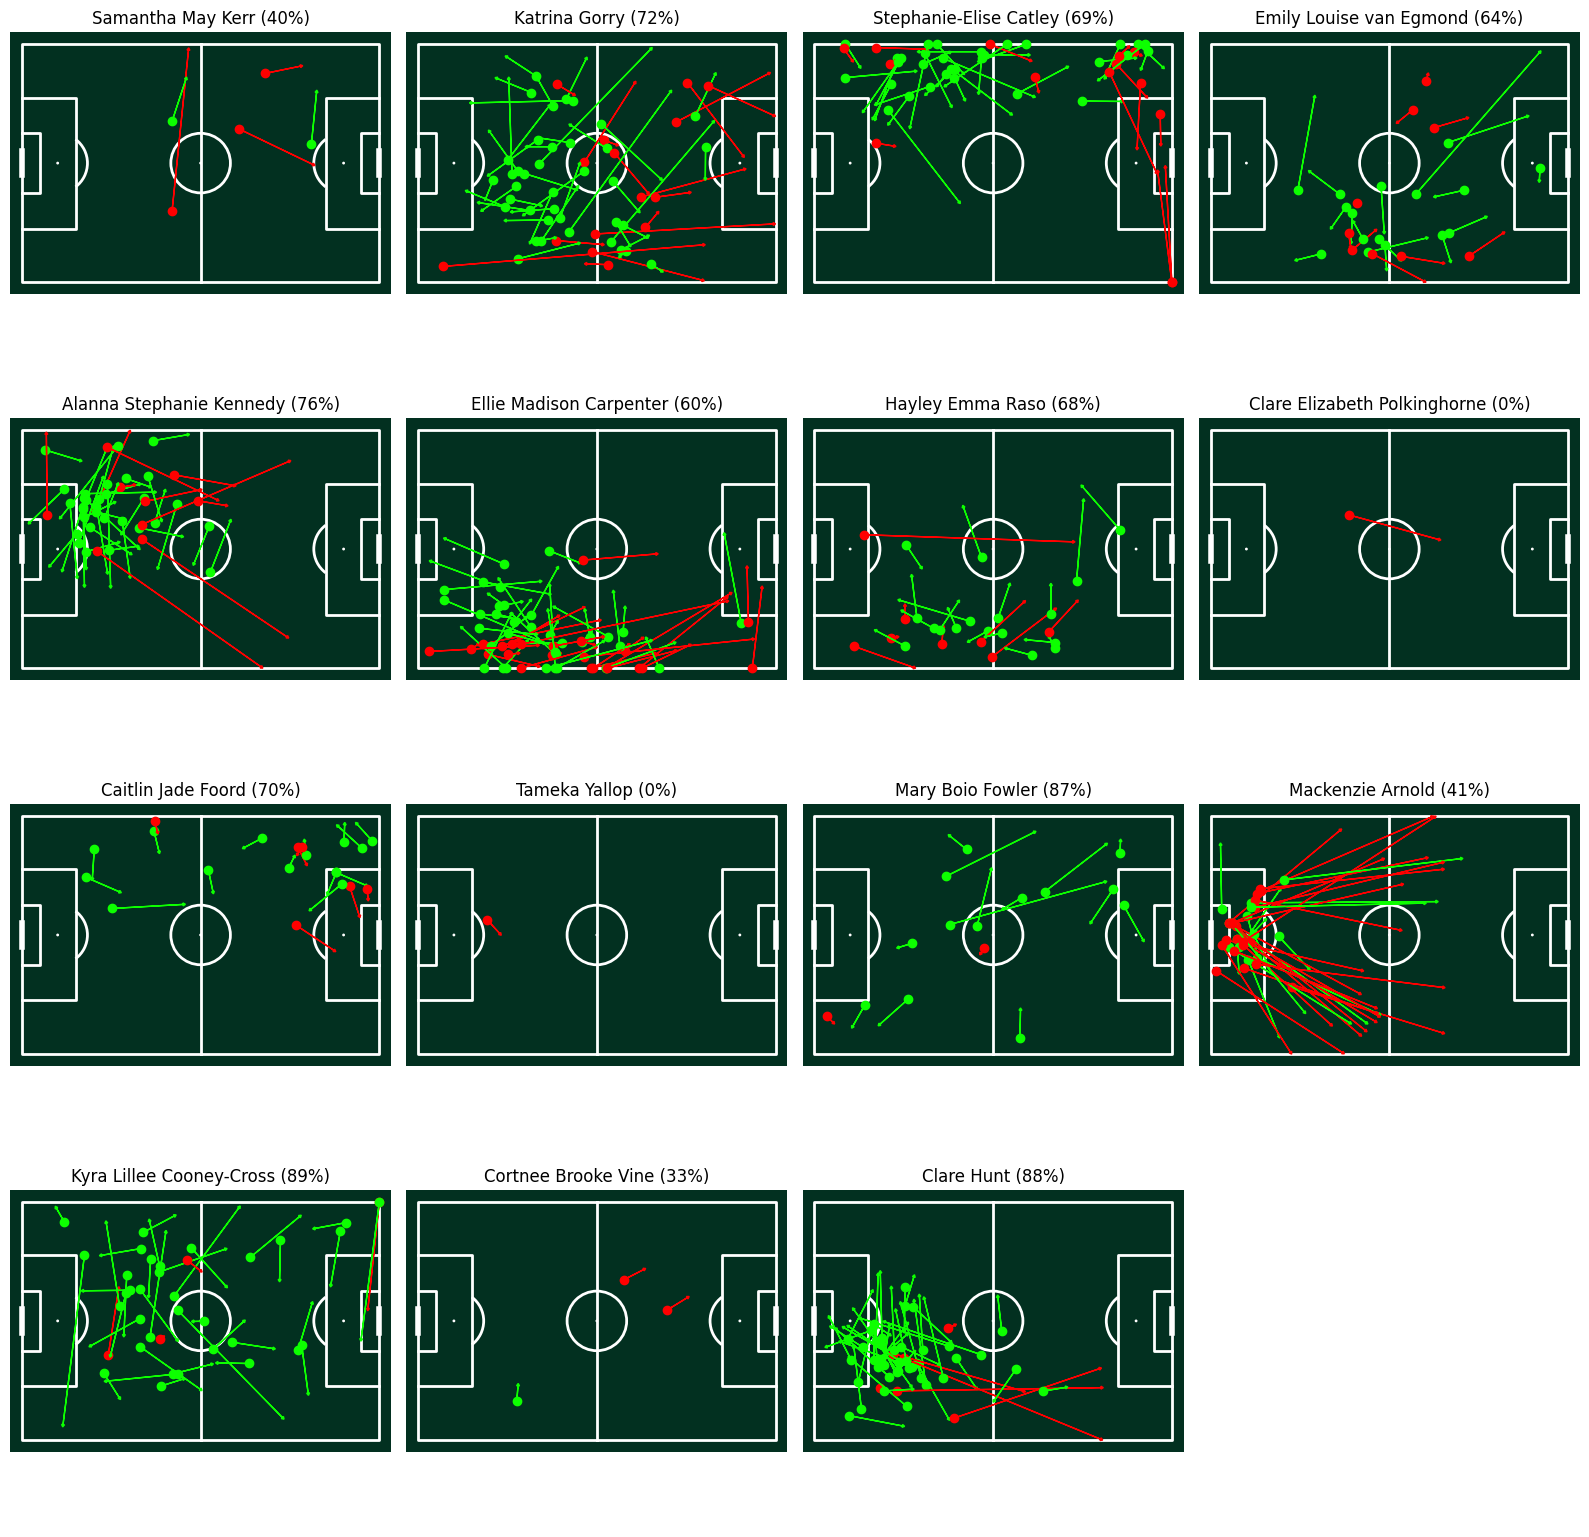

In [46]:
from mplsoccer import Pitch
import matplotlib.pyplot as plt
import pandas as pd

def generatePlayerPassMap(df, players):
    fig, axs = plt.subplots(4, 4, figsize=(16, 16))
    axs = axs.ravel()  # Flatten the 4x4 grid to loop through
    
    ax_idx = 0  # Index to keep track of which subplot to use

    for player_name in players:
        # Filter the dataframe for passes made by the specified player
        player_filter = (df['type_name'] == 'Pass') & (df['player_name'] == player_name)
        player_df = df.loc[player_filter, ['location', 'pass_end_location', 'pass_outcome_name']]
        
        if player_df.empty:
            continue  # Skip to the next player if no pass data is available

        ax = axs[ax_idx]  # Get the current axis
        ax_idx += 1  # Increment the index for the next player

        # Initialize and draw the pitch on the given axis
        pitch = Pitch(line_color='white', pitch_color='#023020')
        pitch.draw(ax=ax)

        # Calculate the percentage of successful passes
        successful_passes = player_df['pass_outcome_name'].isna().sum()
        total_passes = len(player_df)
        success_rate = (successful_passes / total_passes) * 100

        # Loop through the filtered dataframe and plot the passes
        for i in player_df.index:
            x, y = player_df['location'][i]
            end_x, end_y = player_df['pass_end_location'][i]
            dx = end_x - x
            dy = end_y - y
            
            # Check if the pass was incomplete
            if pd.isna(player_df['pass_outcome_name'][i]):
                ax.arrow(x, y, dx, dy, color='#0dff00', length_includes_head=True, head_width=1, head_length=0.8)
                pitch.scatter(x, y, color='#0dff00', ax=ax)
            else:
                ax.arrow(x, y, dx, dy, color='red', length_includes_head=True, head_width=1, head_length=0.8)
                pitch.scatter(x, y, color='red', ax=ax)

        # Set the title for each subplot with the success rate
        ax.set_title(f"{player_name} ({success_rate:.0f}%)", fontsize=12)

    # Turn off any remaining unused subplots
    for i in range(ax_idx, len(axs)):
        axs[i].axis('off')

    plt.tight_layout()
    plt.show()

# Get the list of players from the lineup
players = sb.lineups(match_id=3901736)["Australia Women's"]["player_name"].tolist()

# Test the function
generatePlayerPassMap(df, players)


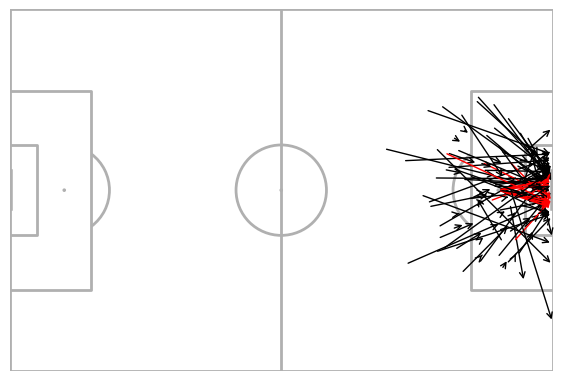

In [47]:
import json
import pandas as pd
import matplotlib.pyplot as plt
from mplsoccer import Pitch

data_id = [3893788, 3893809, 3893821, 3901736, 3902968, 3904629, 3906389]

# Consequently read the json and concatenate into a pre-defined dataframe
all_aus = pd.DataFrame()

for i in data_id:
    with open('AUS/' + str(i) + '.json') as data_file:
        data = json.load(data_file)
    df = pd.json_normalize(data, sep='_')
    if all_aus.empty:
        all_aus = df
    else:
        all_aus = pd.concat([all_aus, df], join='outer', sort=False)

shot_data = all_aus[(all_aus['type_name'] == "Shot") & (all_aus['team_name'] == "Australia Women's")]

fig, ax = plt.subplots(figsize=(7, 5))
pitch = Pitch( half=False)
pitch.draw(ax=ax)

for i in range(len(shot_data)):
    color = "red" if shot_data.iloc[i]['shot_outcome_name'] == "Goal" else "black"
    ax.annotate("", xy=(shot_data.iloc[i]['shot_end_location'][0], shot_data.iloc[i]['shot_end_location'][1]), xycoords='data',
                xytext=(shot_data.iloc[i]['location'][0], shot_data.iloc[i]['location'][1]), textcoords='data',
                arrowprops=dict(arrowstyle="->", connectionstyle="arc3", color=color),)

plt.ylim(0, 80)
plt.xlim(0, 120)
plt.show()


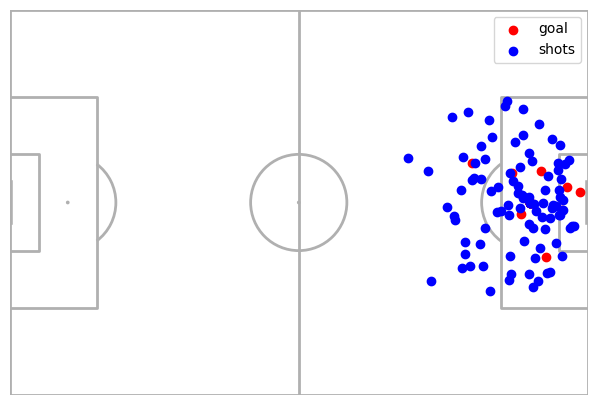

In [48]:
import matplotlib.pyplot as plt
from mplsoccer import Pitch

# Create a figure and axis
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)

# Initialize the half-pitch with the specified colors
pitch = Pitch(half=True)
pitch.draw(ax=ax)

# Extract x and y coordinates of the shot locations that resulted in goals
x_coord_goal = [location[0] for i, location in enumerate(shot_data["location"]) if shot_data.iloc[i]['shot_outcome_name'] == "Goal"]
y_coord_goal = [location[1] for i, location in enumerate(shot_data["location"]) if shot_data.iloc[i]['shot_outcome_name'] == "Goal"]

# Extract x and y coordinates of the shot locations that didn't result in goals
x_coord = [location[0] for i, location in enumerate(shot_data["location"]) if shot_data.iloc[i]['shot_outcome_name'] != "Goal"]
y_coord = [location[1] for i, location in enumerate(shot_data["location"]) if shot_data.iloc[i]['shot_outcome_name'] != "Goal"]

# Plot the goals in red and the other shots in blue
ax.scatter(x_coord_goal, y_coord_goal, c='red', label='goal')
ax.scatter(x_coord, y_coord, c='blue', label='shots')

# Set the y and x limits for the plot
plt.ylim(0, 80)
plt.xlim(0, 120)

# Add a legend
plt.legend(loc='upper right')

# Turn off the axis
plt.axis('off')

# Display the plot
plt.show()


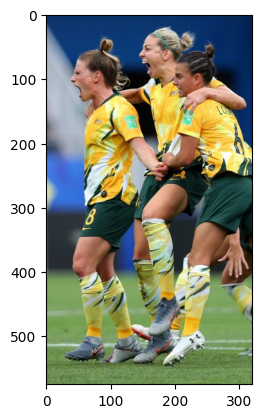

In [49]:
aus = plt.imread("aus.jpeg")
plt.imshow(aus)
plt.show()

In [50]:
def draw_half_pitch(ax):
    # focus on only half of the pitch
    #Pitch Outline & Centre Line
    Pitch = Rectangle([60,0], width = 60, height = 80, fill = False)
    #Right Penalty Area
    RightPenalty = Rectangle([105.4,22.3], width = 14.6, height = 35.3, fill = False)

    #Right 6-yard Box
    RightSixYard = Rectangle([115.1,32], width = 4.9, height = 16, fill = False)


    #Prepare Circles
    centreCircle = Arc((60,40),width = 8.1, height = 8.1, angle=0,theta1=270,theta2=90,color="black")
    centreSpot = plt.Circle((60,40),0.71,color="black")
    rightPenSpot = plt.Circle((110.3,40),0.71,color="black")
    rightArc = Arc((110.3,40),height=16.2,width=16.2,angle=0,theta1=130,theta2=230,color="black")
    
    element = [Pitch, RightPenalty, RightSixYard, centreCircle, centreSpot, rightPenSpot, rightArc]
    for i in element:
        ax.add_patch(i)
     

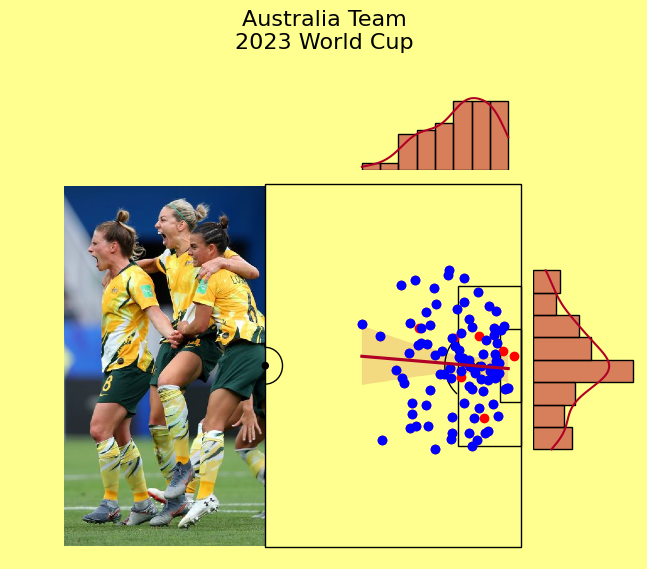

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage
from mplsoccer import Pitch

# Extract x and y coordinates of the shot locations that resulted in goals
x_coord_goal = [location[0] for i, location in enumerate(shot_data["location"]) if shot_data.iloc[i]['shot_outcome_name'] == "Goal"]
y_coord_goal = [location[1] for i, location in enumerate(shot_data["location"]) if shot_data.iloc[i]['shot_outcome_name'] == "Goal"]

# Extract x and y coordinates of the shot locations that didn't result in goals
x_coord = [location[0] for i, location in enumerate(shot_data["location"]) if shot_data.iloc[i]['shot_outcome_name'] != "Goal"]
y_coord = [location[1] for i, location in enumerate(shot_data["location"]) if shot_data.iloc[i]['shot_outcome_name'] != "Goal"]

cmap = plt.cm.YlOrRd_r  # import colormap

# Updated jointplot call
joint_shot_chart = sns.jointplot(x=x_coord, y=y_coord, kind='reg', space=0, color=cmap(0.1))
joint_shot_chart.fig.set_size_inches(7, 5)
joint_shot_chart.fig.set_facecolor('#FFFF8F') 
ax = joint_shot_chart.ax_joint

# Draw the half pitch
draw_half_pitch(ax)

# Plot the goals in red and the other shots in blue
ax.scatter(x_coord_goal, y_coord_goal, c='red', label='goal')
ax.scatter(x_coord, y_coord, c='blue', label='shots')

# Get rid of axis labels and tick marks
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title('Australia Team\n2023 World Cup',x=0.6, y=1.3, fontsize=16)

img = OffsetImage(aus, zoom=0.4501)
img.set_offset((64, 23))  # Adjust the coordinates to position the image
ax.add_artist(img)

joint_shot_chart.ax_marg_x.set_axis_off()
joint_shot_chart.ax_marg_y.set_axis_off()
ax.set_axis_off()
plt.xlim(0, 123)
plt.ylim(-.5, 83)
plt.axis('off')
plt.show()
